Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart_disease_data.csv')

In [3]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [6]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [8]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

,count
target,
1,165
0,138


1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [10]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [11]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [12]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [15]:
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

Model Training

Support Vector Machine

In [16]:
svclassifier = SVC(kernel='linear')
SVC_Model = svclassifier.fit(X_train, Y_train)
print("Train Score "+str(SVC_Model.score(X_train, Y_train)))
print("Test Score "+str(SVC_Model.score(X_test, Y_test)))

Train Score 0.8347107438016529
Test Score 0.8688524590163934


In [17]:
# training the LogisticRegression model with Training data
print(SVC_Model)

SVC(kernel='linear')


## Hyperparameters of SVM using GridSearchCV

In [18]:
ParameterSampler = { 'C' :[0.001 , 0.01, 0.1, 1, 10 ,100],
                    'kernel':['poly','linear','rbf'],
                     'gamma':[0.001 , 0.01, 0.1, 1, 10 ,100]
                     }

Grid_Search = GridSearchCV(SVC(), ParameterSampler, cv=5)
Grid_Search.fit(X_train, Y_train)

print('Training_Score  '+str(Grid_Search.score(X_train, Y_train)))
print('Test_Score  '+str(Grid_Search.score(X_test, Y_test)))

Training_Score  0.859504132231405
Test_Score  0.8852459016393442


In [19]:
print(Grid_Search.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


## Hyperparameters of SVM using RandomizedSearchCV

In [20]:
ParameterSampler = { 'C' :[0.001 , 0.01, 0.1, 1, 10 ,100],
                    'kernel':['poly','linear','rbf'],
                     'gamma':[0.001 , 0.01, 0.1, 1, 10 ,100]
                     }
Random_Search = RandomizedSearchCV(SVC(), ParameterSampler, cv=5)
Random_Search.fit(X_train, Y_train)

print('Training_Score  '+str(Random_Search.score(X_train, Y_train)))
print('Test_Score  '+str(Random_Search.score(X_test, Y_test)))

Training_Score  0.8429752066115702
Test_Score  0.8688524590163934


In [21]:
print(Random_Search.best_params_)

{'kernel': 'linear', 'gamma': 100, 'C': 100}


In [22]:
from sklearn.metrics import accuracy_score
# GridSearchCV provide best_params
best_params = {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

# Create a new SVM model with the best parameters
svm_model = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

# Fit the model on the training data
svm_model.fit(X_train, Y_train)

# Now make predictions on the test data
predictions = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = svm_model.score(X_test, Y_test)
print(f'Accuracy of the SVM model with best parameters: {accuracy:.2f}')



Accuracy of the SVM model with best parameters: 0.89


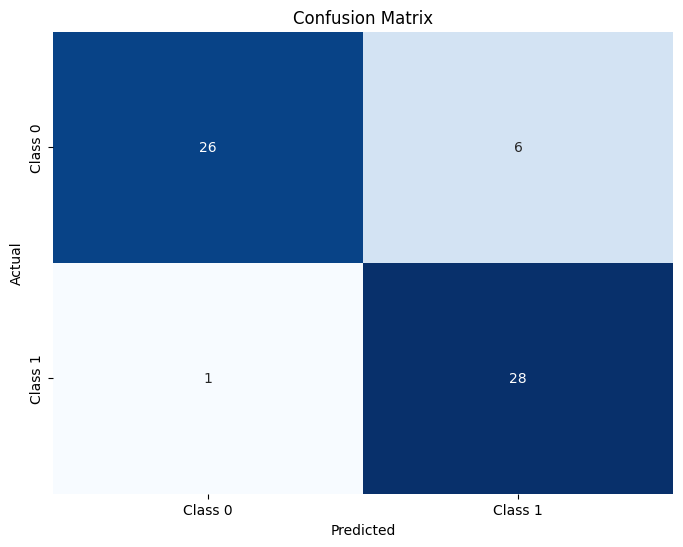

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.96      0.81      0.88        32
     Class 1       0.82      0.97      0.89        29

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.88        61



In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have predictions and actual labels
predictions = svm_model.predict(X_test)

# 1. Confusion Matrix
cm = confusion_matrix(Y_test, predictions)

# 2. Plot Colorful Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. Classification Report
print("Classification Report:\n")
print(classification_report(Y_test, predictions, target_names=['Class 0', 'Class 1']))


Building a Predictive System

In [25]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = SVC_Model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease
